# 웹 브라우저를 이용한 스크레이핑

1. 웹 브라우저 원격 조작에 사용하는 Selenium
1. 윈도우에서 실행
1. [네이버 구매목록 가져오기](#네이버-구매목록-가져오기)


> Selenium v4 기반

# Selenium

Selenium은 웹 브라우져를 컨트롤하여 웹 UI 를 Automation 하는 도구 중의 하나이다. 그래서 웹 애플리케이션 테스트를 위해 개발되었지만 최근 자바스크립트 이용 웹 사이트를 크롤링하는 용도로도 각광받고 있다.

Selenium은 Selenium Server와 Selenium Client가 있는데, 로컬 컴퓨터의 웹 브라우져를 컨트롤하기 위해서는 Selenium Client 를 사용한다 (여기서는 Selenium 3 사용). 

Selenium Client는 WebDriver라는 공통 인터페이스(Common interface)와 각 브라우져 타입별(Chrome, FireFox, IE 등)로 하나씩 있는 Browser Driver로 구성되어 있다. 이런 일반브라우저와 다르게 헤드리스 브라우저로 PhtomJS도 스크래핑 기술에 유용하다.



자바스크립트를 많이 사용하는 웹 사이트는 웹 브라우저를 사용하지 않을 경우 제대로 동작을 확인할 수 없습니다. 그래서 이러한 사이트는 이전에 소개한 requests 모듈로 대처할 수 없습니다.

Selenium을 이용하면 자동으로 URL을 열고 클릭할 수 있으며, 스크롤하거나, 문자를 입력하는 등의 다양한 조작을 자동화할 수 있습니다. 또한 화면을 캡처해서 이미지로 저장하거나 HTML의 특정 부분을 꺼내는 것도 가능합니다.

https://selenium-python.readthedocs.io

### 설치

최신 Selenium is upgraded to v4.x

```
pip3 install -U selenium
pip3 install webdriver-manager
```


Selenium 3 까지는 selenium 만 설치해도 충분.

```
pip install --user selenium
```

In [1]:
! pip install -U selenium

     ---------------------------------------- 6.0/6.0 MB 76.6 MB/s eta 0:00:00
     ---------------------------------------- 384.9/384.9 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00


In [2]:
! pip install webdriver-manager

> 2022/6 : selenium v4.1.5 에서 테스트

In [3]:
from selenium import webdriver
webdriver.__version__

'4.6.1'

### Webdriver

Selenium은 Webdriver 라는 인터페이스를 통해서 실제 브라우저를 동작해 조작한다. 그래서 브라우저와 연결하는 드라이버를 설치해야 한다. chrome, firefox 등 대부분 드라이버를 사용할 수 있다.

다음은 대표적인 WebDriver 이다.

- PhantomJS: http://phantomjs.org
- Firefox : https://github.com/mozilla/geckodriver/releases
- Chrome : 
    - https://chromedriver.chromium.org/downloads
    - ~~https://sites.google.com/a/chromium.org/chromedriver/downloads~~
- Edge : https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/

> 2019-1월 현재 
> Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
> 대신 chrome, firefox 에서 headless 옵션을 이용해 사용한다.

WebdriverManager 를 통해서 현재 실행중인 브라우저의 버전에 적합한 드라이버를 자동으로 다운받아 사용할 수 있게 되어 있다.

### Webdriver Manager

Selenium 3.0 코드에서는 Broswer 버전에 맞는 web drvier를 다운로드하고 web driver (=chrom driver)의 위치를 지정했어야 했었습니다. 이 경우 동일한 코드로 OS가 변경되거나, Broswer  업데이트되는 경우 이에 맞춰서 변경을 계속해야 합니다. Selenium 4.0부터는 WebDriver Manager 가 자동으로 Web browser의 버전을 확인하고 OS와 버전에 맞는 webdriver를 다운로드하고 실행합니다



# Selenium 사용


Selenium을 사용하기 위해서는 먼저 `selenium.webdriver` 모듈을 import 한 후, `webdriver.Firefox()` 를 호출하여 브라우져를 실행시킨다. 만약 크롬을 사용할 경우 `webdriver.Chrome()`을 호출하고, Edge를 사용할 경우 `webdriver.Edge()`을 호출한다.

브라우져를 띄운 상태에서 특정 웹사이트로 이동하기 위해서는 아래와 같이 browser 객체의 get() 메서드를 사용한다.

### macOS 에서 chromedriver 처음 사용시

확인되지 않은 개발자 경고가 나온다. 아래 같이 보안 및 개인정보보호에서 다운로드한 앱 허용을 해야 한다.

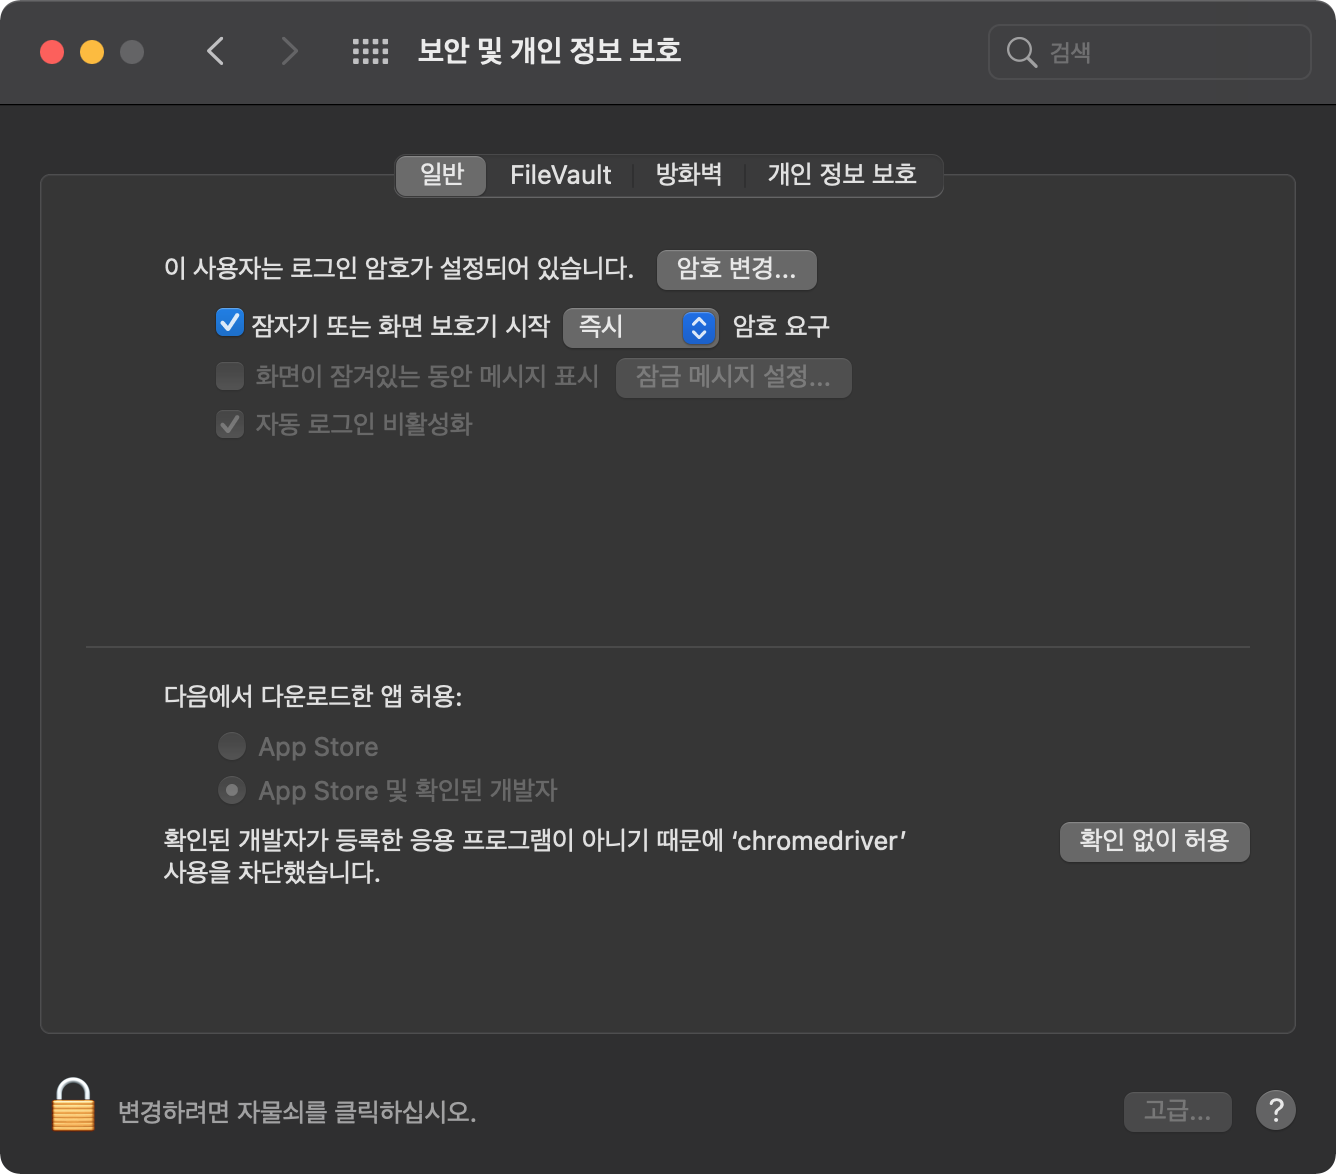

그리고 webdriver.Chrome() 실행을 하면 macOS 화면에서 다음 다이얼로그를 허용해 주어야 한다.

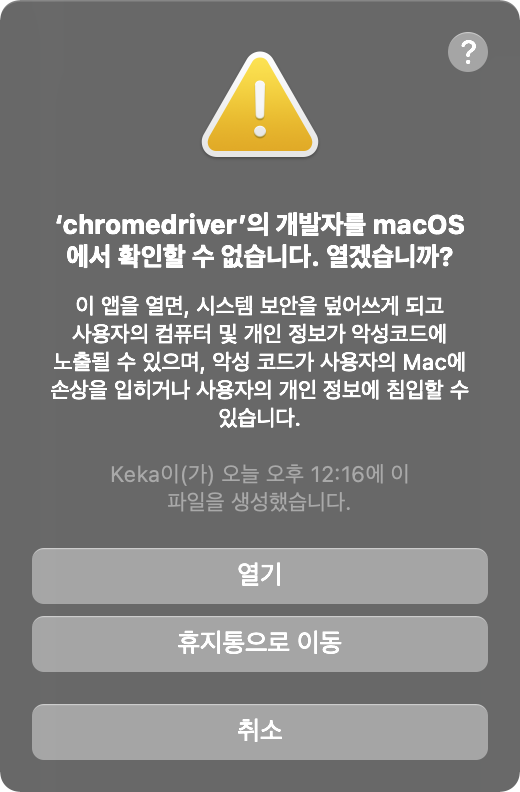

### 브라우저 프로세스 정리

웹 드라이버 사용시 해당 브라우저의 프로세스가 포그라운드 혹은 백그라운드로 실행되므로 사용후 정리할 필요가 있다.

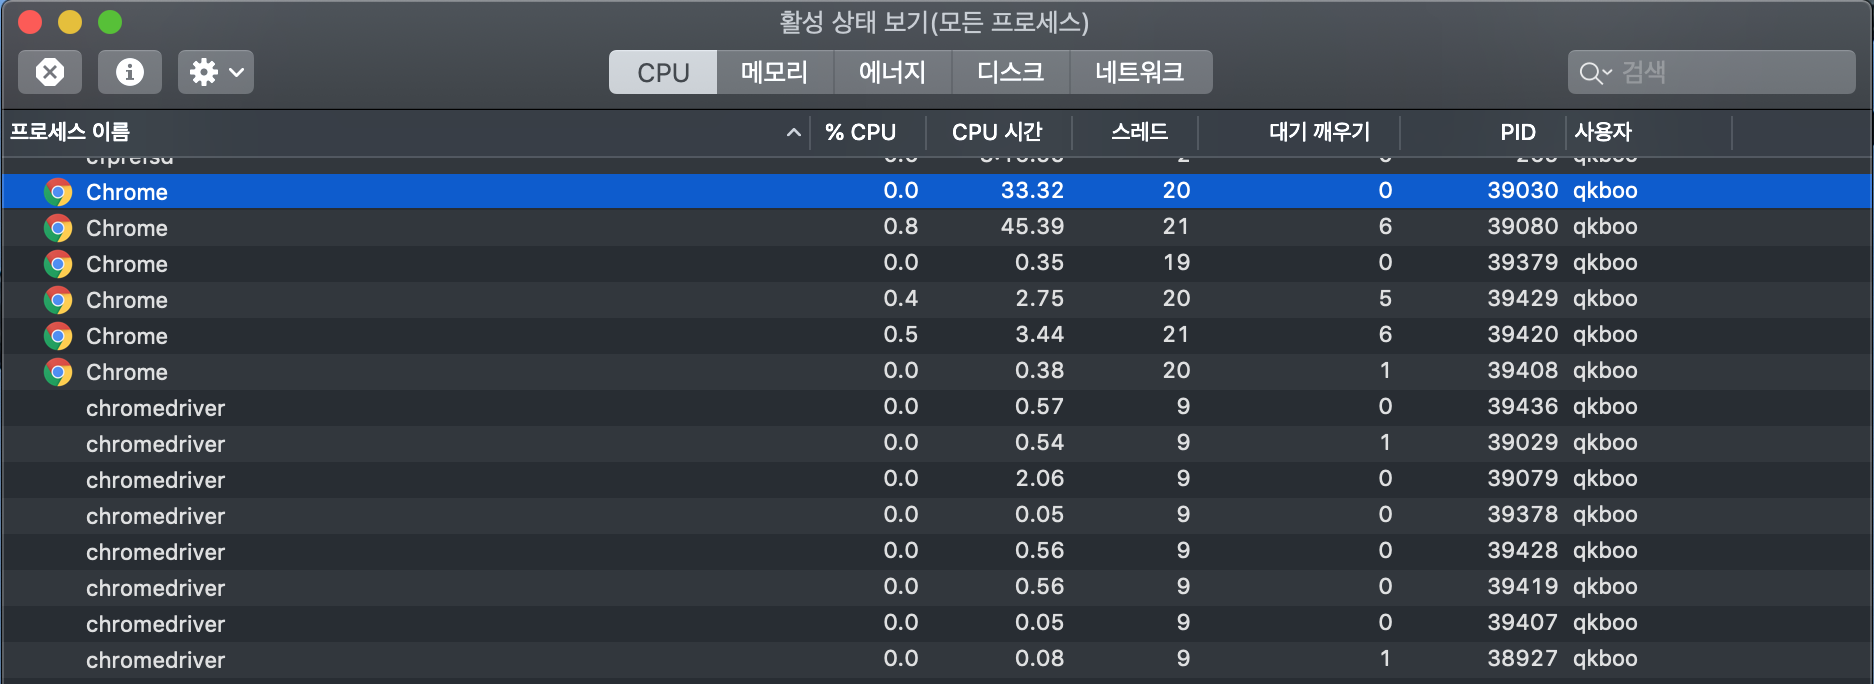

### 크롬 바이너리 에러가 발생시

Selenium v4 에서 아래 같이 v3 방식으로 사용하면 경고가 발생한다.

> Message: unknown error: cannot find Chrome binary

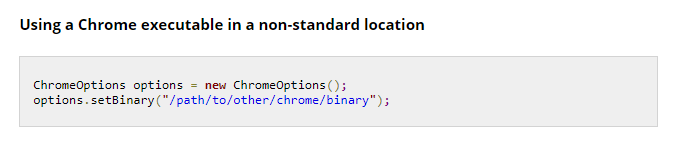

```python
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"  # win 11
# options.binary_location = "C:\\Program Files\\Google\\Chrome\\chrome.exe"

driver = webdriver.Chrome(chrome_options = options, executable_path="../drivers/102.0.5005.27/chromedriver.exe")
# driver = webdriver.Chrome(chrome_options = options, executable_path=r'C:\path\to\chromedriver.exe')

driver.get('https://google.com/')
print("Chrome Browser Invoked")
driver.quit()
```

## Selenium v4 compatible Code Block

WebdriverManager 사용

1. 웹드라이버 매니저는 기존에 사용자가 직접 웹드라이버를 찾고, 사용하는 브라우저 버전을 확인하는 교차 검증까지 해야했던 수고를 덜게 해준다.

2. 모듈이 알아서 사용하는 브라우저의 버전을 탐색한 다음, 버전에 맞는 웹드라이버를 다운로드해서 그 경로를 셀레니움에 전달까지 해준다.

3. 현재 지원하는 것은 크롬, 파이어폭스, IE, 오페라, 엣지 이렇게 5종

4. 참고로 리눅스 OS에서 사용 가능한 크로미움의 경우 기존에는 크롬으로 인식이 가능했지만, 웹드라이버 매니저의 경우 크롬과 크롬드라이버를 별개로 취급하니 이에 대해서도 따로 추가 작업을 해줘야 한다.

### 크롬

Web Driver 동작 시 아래와 같이 Chrome version을 확인하고 OS에 맞는 Web driver를 /.wdm/driver에 다운로드하고 사용합니다.  첫 번째 실행 이후에는 cache를 재 사용하기 때문에 Local에 미리 설치할 필요가 없습니다. 


In [4]:
# Selenium v4 compatible Code Block
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
# Selenium v3
# driver = webdriver.Chrome(ChromeDriverManager().install())

# Selenium v4
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 30.7MB/s]


In [5]:
# 별도의 크롬브라우저가 실행된다.
driver.get("https://www.google.com")

In [6]:
driver.quit()

### 다른 브라우저 예제

파이어폭스, 엣지, 오페라

firefox(파이어폭스)의 경우 파이어폭스가 아닌 Gecko로 용어를 혼용해서 사용하고 있다.

```python
# 파이어폭스
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager

driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
```

```python
# IE
from selenium import webdriver
from selenium.webdriver.ie.service import Service
from webdriver_manager.microsoft import IEDriverManager

driver = webdriver.Ie(service=Service(IEDriverManager().install()))
``` 

```python
# 엣지
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
``` 

```python
# 오페라(selenium 3 & 4)
from selenium import webdriver
from webdriver_manager.opera import OperaDriverManager

driver = webdriver.Opera(executable_path=OperaDriverManager().install())
``` 

### Headless로 네이버 메인 화면 캡쳐하기

Chrome과 Firefox Webdriver는 Options 객체를 통해 Headless 모드로 사용할 수 있다. 그리고 Selenium은 기본적으로 웹 자원들이 모두 로드될때까지 기다려주지만, 암묵적으로 모든 자원이 로드될때 까지 기다리게 하는 시간을 직접 `implicitly_wait()` 을 통해 지정할 수 있다.

selenium v3 기반

```python
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# create a new chrome session
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox') # Bypass OS security model

driver = webdriver.Chrome(options = options, executable_path="../drivers/102.0.5005.27/chromedriver.exe")
```

In [8]:
import time

In [9]:
time.sleep(3)

In [7]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

# create a new chrome session
options = Options()
options.add_argument('headless') #--headless
options.add_argument('window-size=1920x1080')
# options.add_argument("start-maximized")
options.add_argument('no-sandbox') #--no-sandbox, # Bypass OS security model

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
# driver.maximize_window()

driver.get("https://www.naver.com")
driver.implicitly_wait(3)
# time.sleep(5)
# 화면 스크린샷
driver.save_screenshot("naver_com.png") 


True

In [10]:
# ipython 의 display를 사용해서 이미지를 표시.
from IPython.display import Image

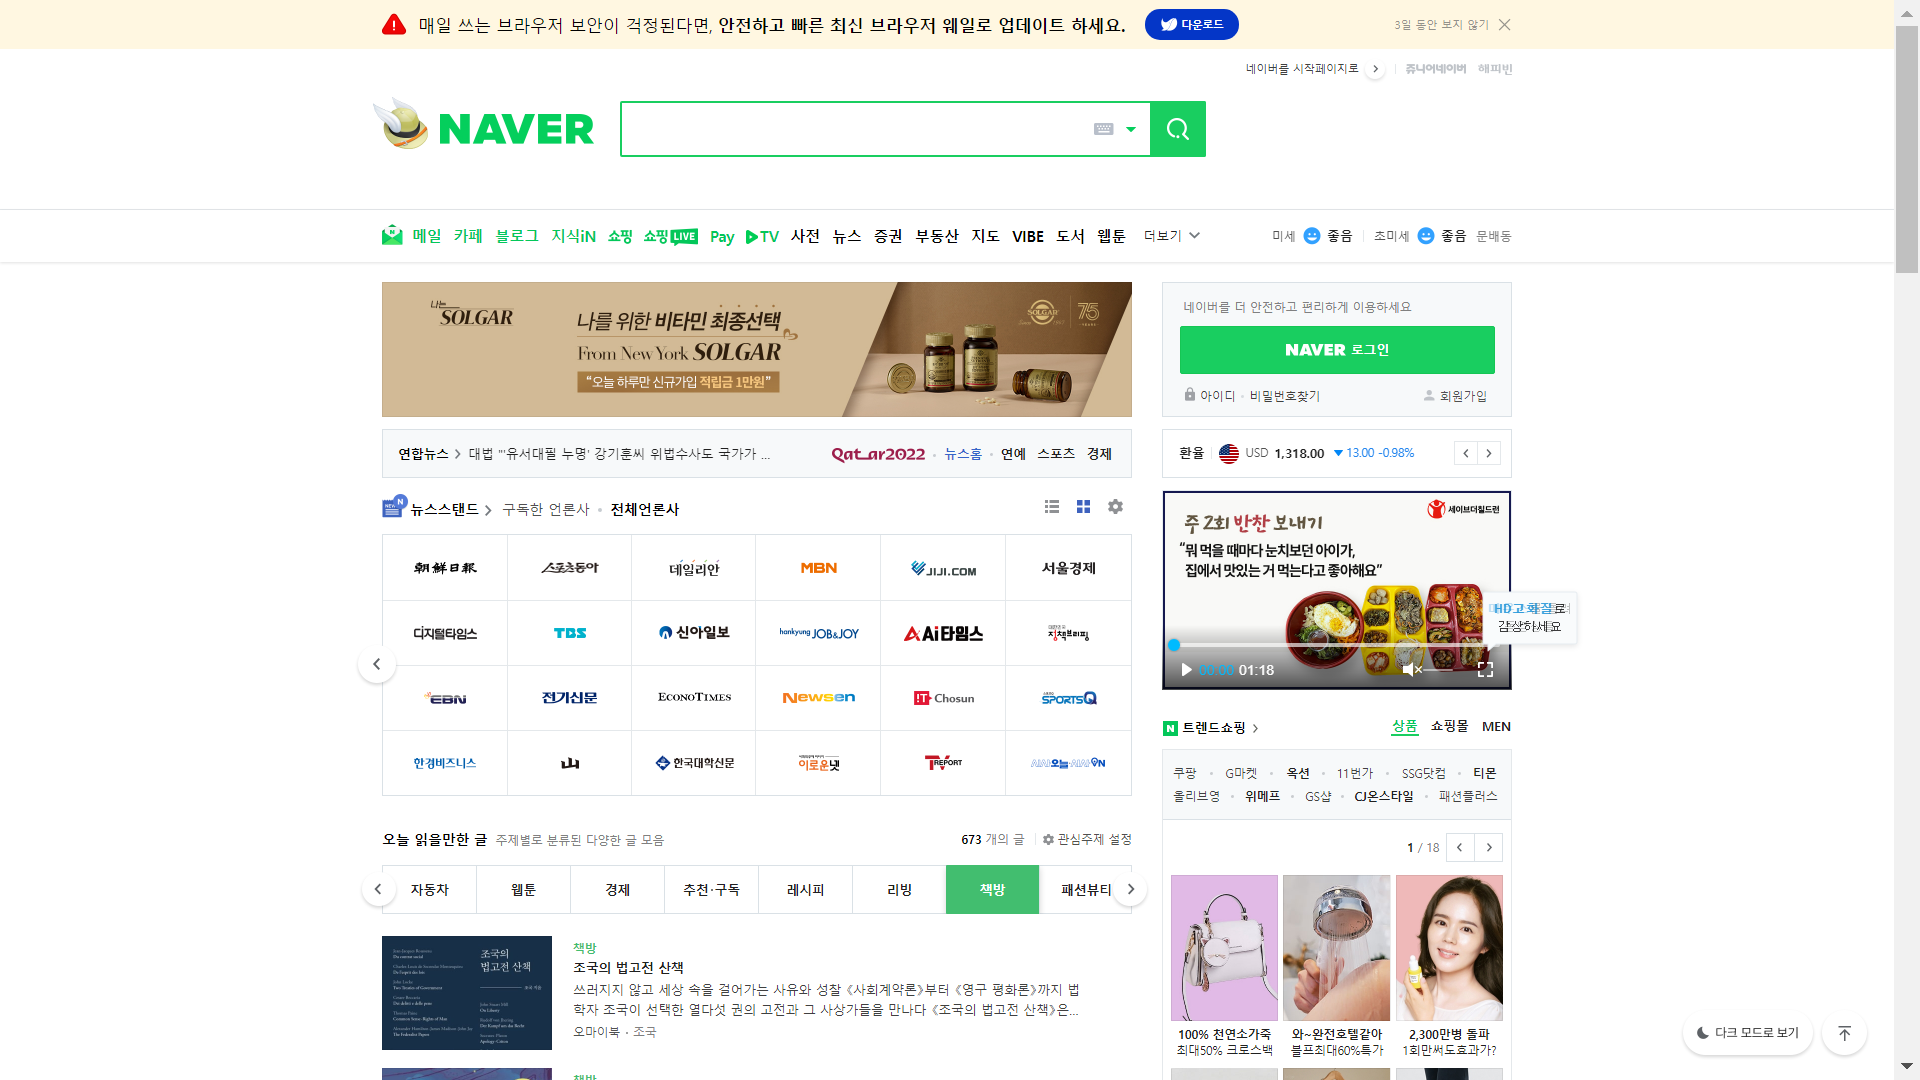

In [12]:
Image(driver.get_screenshot_as_png(), width=800)

In [13]:
driver.quit()

### Options 정리

selenium에서 shared memory가 부족하면 아래 에러가 발생할 수 있다. 따라서 --disable-dev-shm-usage 옵션도 추가해준다.

### User-Agent 사용하기

In [ ]:
# create a new chrome session
options = Options()
options.add_argument('headless') #--headless
options.add_argument('window-size=1920x1080')
options.add_argument('no-sandbox') #--no-sandbox
#options.add_argument("start-maximized")

# UserAgent값을 바꿔줍시다!
options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
# driver.maximize_window()

driver.get("https://www.naver.com")
driver.implicitly_wait(3)

# 화면 스크린샷
driver.save_screenshot("naver_com.png") 

driver.quit()

### Headless  사용시 주의

> https://beomi.github.io/gb-crawling/posts/2017-09-28-HowToMakeWebCrawler-Headless-Chrome.html

### Implicitly & Explicitly Wait 비교

> https://beomi.github.io/gb-crawling/posts/2017-10-29-HowToMakeWebCrawler-ImplicitWait-vs-ExplicitWait.html

### PhantomJS

headless 드라이버로 많이 사용했던 phantomjs 는 Selenium 3.8.1 이후 deprecated 되었다.
- <u>***PhantomJS was deprecated in Selenium 3.8.1***</u>
- https://phantomjs.org/download.html 에서 드라이버를 다운받아 사용한다.
- Binary 자체로 제공되기 때문에, Linux를 제외한 OS에서는 외부 dependency없이 바로 실행할 수 있다.

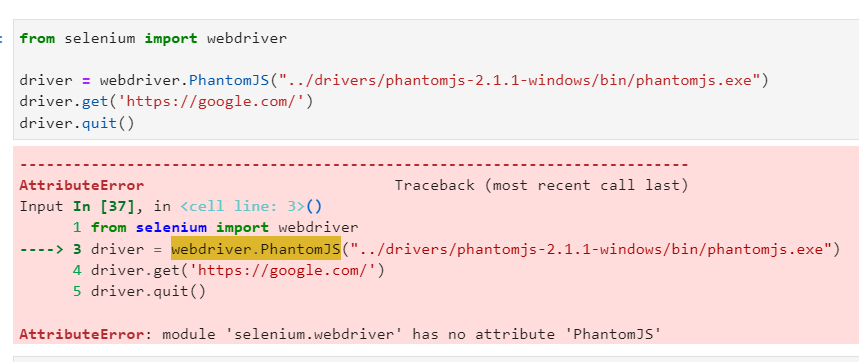

## Selenium 검색

Selenium은 웹페이지 내의 특정 요소(들)을 찾는 많은 메서드들을 제공하고 있는데, 자주 사용되는 몇가지 검색 메서드를 예를 들면, 

 - find_element_*(): 이들은 보통 한 요소를 리턴
 - find_elements_*(): 혹은 복수 요소를 리턴
 - find_element_by_id(): 특정 태그 id 로 검색
 - find_element_by_name(): 특정 태그 name 속성으로 검색
 - find_element_by_class_name(): CSS 클래스명으로 검색
 - find_element_by_css_selector(): CSS selector를 사용해 검색
 
 
검색 결과 리턴되는 객체는 `WebElement` 객체다.
- WebElement.text: 요소 내의 문자열을 리턴
- WebElement.tag_name : 해당 요소의 태크명 (예: a, span) 을 리턴
- WebElement.clear(): text 입력 영역을 초기화하고
- WebElement.click() 메서드를 호출하면 해당 요소를 클릭.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.implicitly_wait(3)

In [30]:
# driver.get('https://www.google.com/')

In [31]:
driver.page_source

MaxRetryError: HTTPConnectionPool(host='localhost', port=64961): Max retries exceeded with url: /session/8e74fca7fc2c3792986de607657bd5ba/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001D702C26670>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [ ]:
Image(driver.get_screenshot_as_png(), width=500)

구글 검색창에 검색어를 입력하고 엔터 키를 보내 검색을 실행한다.

In [ ]:
# driver.get('https://www.google.com/')

# 타이틀에 'Google'이 포함돼 있는지 확인합니다.
#assert 'Google' in driver.title
input_element = driver.find_element(by=By.NAME, value='q')
input_element.send_keys('Python')
Image(driver.get_screenshot_as_png(), width=500)

In [ ]:
# 검색어를 입력하고 검색합니다.
input_element = driver.find_element(by=By.NAME, value='q')
input_element.send_keys('Python')
input_element.send_keys(Keys.RETURN)

driver.title

In [22]:
# 스크린샷을 찍습니다.
driver.save_screenshot('goonaver_search_results.png')

True

In [23]:
driver.find_elements(By.CSS_SELECTOR, 'h3 > a')

[<selenium.webdriver.remote.webelement.WebElement (session="8e74fca7fc2c3792986de607657bd5ba", element="d4b4007d-f170-40e2-a13d-880b5315be10")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e74fca7fc2c3792986de607657bd5ba", element="e665a9b3-1ac6-48b5-b1e5-7cfe3a384a9c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e74fca7fc2c3792986de607657bd5ba", element="e8532c8e-bb09-480c-8be8-19fd82bcde5d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e74fca7fc2c3792986de607657bd5ba", element="2a833702-1ff7-436a-8c70-714213ffd5b4")>]

In [24]:
# 검색 결과를 출력합니다.
# for a in driver.find_elements_by_css_selector('h3 > a'):
for a in driver.find_elements(By.CSS_SELECTOR, 'h3 > a'):
    print(a.text)
    print(a.get_attribute('href'))
    print()

Downloads
https://www.python.org/downloads/

파이썬 자습서
https://docs.python.org/ko/3/tutorial/index.html

Tutorial
https://docs.python.org/3/tutorial/

Python For Beginners
https://www.python.org/about/gettingstarted/



In [25]:
driver.quit()

## 네이버 검색어 입력

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [ ]:
# 네이버에 접속
driver.get("https://www.naver.com")
driver.implicitly_wait(3)

# 검색어 창에 검색어를 입력
input_search = driver.find_element(By.XPATH, "//*[@id=\"query\"]")
input_search.send_keys("파이썬 Selenium")

# 검색 버튼 눌러
btn_submit = driver.find_element(By.CSS_SELECTOR, "#search_btn")
btn_submit.click()

driver.implicitly_wait(2)
driver.save_screenshot('naver_com.png')

### error: 

click() 사용시 `ElementNotInteractableException           ` 만날때는 보통 click() 이벤트 사용시.

```
btn_submit = driver.find_element(By.CSS_SELECTOR, "#search_btn")
btn_submit.click()
```

click() 대신에 `input_element.send_keys(Keys.ENTER)` 사용

In [ ]:
from bs4 import BeautifulSoup

dom = BeautifulSoup(driver.page_source)

print(dom.prettify())
# 여기서부터 데이터 수집 작업을 진행

In [ ]:
driver.quit()

# google finance

In [ ]:
import bs4 as bs
from selenium import webdriver  

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get("https://www.google.com/finance?q=tsla")
html_source = driver.page_source
driver.quit()

In [ ]:
soup = bs.BeautifulSoup(html_source, "lxml")

for el in soup.find_all("div", {"class": "yY3Lee"}):
    print(el.get_text())

# Actions 

## 마우스오버

인스타그램의 좋아요 댓글 수 등은 마우스 오버로 표현되어 있다. 이것은 Actions 의 메소드 .move_to_element()를 사용해 준다. 위에서 액션체인을 한 번 사용해 주었기 때문에 오류 방지를 위해 새로 정의해 주자.

In [ ]:
#04. 게시물애 마우스 올리기(마우스 오버)
#첫 번째 게시물의 xpath 경로 지정
pead = dr.find_element_by_xpath('//*[@id="mount_0_0_BL"]/div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/div/div[5]/article/div[1]/div/div[1]/div[1]')

#게시물로 마우스 옮기기 실행
act = ActionChains(dr)
act.move_to_element(pead).perform()
time.sleep(1) #로딩 시간 기다림


In [32]:
import bs4 as bs
from selenium import webdriver  

In [33]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get('https://www.burgerking.co.kr/')
driver.implicitly_wait(3)

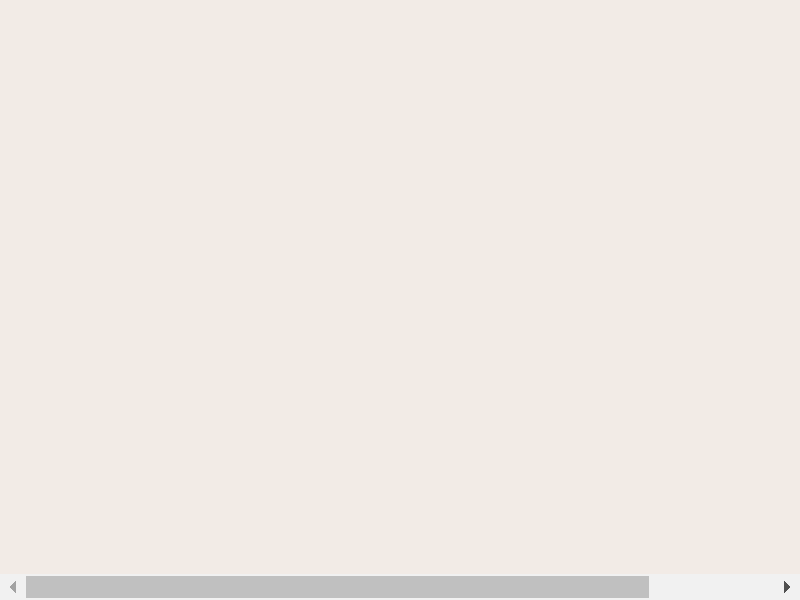

In [35]:
# ipython 의 display를 사용해서 이미지를 표시.
from IPython.display import Image
Image(driver.get_screenshot_as_png(), width=600)

In [42]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# 매장찾기 버튼!
# driver.find_element(by=By.CSS_SELECTOR, value='.head_menuWrap > .GNBWrap > .menu_open > .submenu > a').click()
elm = driver.find_element(by=By.class=list02, value='#app > div > div.contentsWrap > div.contentsBox01.nopadding > div > div.map_searchWrap > div.map_search_head > div.tab01 > ul > li.on > button > span')

SyntaxError: invalid syntax (3656362924.py, line 6)

In [37]:
from selenium.webdriver import ActionChains

In [ ]:
actions = ActionChains(driver).send_keys_to_element(elm).send_keys(Keys.ENTER)
actions.perform()

In [ ]:
Image(driver.get_screenshot_as_png(), width=600)

## Naver 로그인

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.maximize_window()

# www.naver.com에 접속
driver.get("https://www.naver.com")


In [ ]:
# 로그인 버튼의 xpath : //*[@id="account"]/a
btn_login = driver.find_elements_by_xpath("//*[@id=\"account\"]/a")[0]
btn_login.click() # 클릭 이벤트 전송

# 잠시만 대기
driver.implicitly_wait(3)
driver.save_screenshot("naver_com-login.png") 

In [ ]:
_id = input('Naver ID')

In [ ]:
import getpass

_pw = getpass.getpass()

In [ ]:
# 아이디 입력창을 찾아서 키보드 입력을 전송
#input_id = driver.find_element_by_css_selector("#id")
input_id = driver.find_element(by=By.CSS_SELECTOR, value="#id")
input_id.send_keys(_id) #"YOUR_ID
# 비밀번호 입력창을 찾아서 키보드 입력을 전송
input_pw = driver.find_element(by=By.CSS_SELECTOR, value="#pw")
#input_pw = driver.find_element_by_css_selector("#pw")
input_pw.send_keys(_pw) #"YOUR_PW

driver.implicitly_wait(1)

driver.save_screenshot("naver_com-login2.png") 

In [ ]:
# 로그인 버튼을 누른다
btn_submit = driver.find_element(by=By.XPATH, value="//*[@id=\"log.login\"]")
#btn_submit = driver.find_element_by_xpath("//*[@id=\"log.login\"]")
btn_submit.click()

# 잠시만 대기
driver.implicitly_wait(3)

driver.save_screenshot("naver_com-login3.png") 


In [ ]:
Image(driver.get_screenshot_as_png(), width=600)

In [ ]:
driver.quit()